<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C1W3_4_Reviwe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Access the file system and download zipfile
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-06-06 22:13:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   145MB/s    in 1.0s    

2020-06-06 22:13:48 (145 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-06-06 22:13:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]


In [0]:
# Extract zip files
import os
import zipfile

# Files PATH
local_train_zip = '/tmp/horse-or-human.zip'
local_validation_zip = '/tmp/validation-horse-or-human.zip'

# Extract zipfiles
train_zip_ref = zipfile.ZipFile(local_train_zip, 'r')
train_zip_ref.extractall('/tmp/horse-or-human')
train_zip_ref.close()

validation_zip_ref = zipfile.ZipFile(local_validation_zip, 'r')
validation_zip_ref.extractall('/tmp/validation-horse-or-human')
validation_zip_ref.close()

In [0]:
# Image file path
train_horses_dir = os.path.join('/tmp/horse-or-human/horses')
train_humans_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horses_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_humans_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [0]:
# Check the file name and file numbers
train_horses_names = os.listdir(train_horses_dir)
train_humans_names = os.listdir(train_humans_dir)
validation_horses_names = os.listdir(validation_horses_dir)
validation_humans_names = os.listdir(validation_humans_dir)

print("train horses file names :", train_horses_names[0:5])
print("train humans file names :", train_humans_names[0:5])

print("train horses file numbers :", len(os.listdir(train_horses_dir)))
print("train humans file numbers :", len(os.listdir(train_humans_dir)))
print("validation horses file numbers :", len(os.listdir(validation_horses_dir)))
print("validation humans file numbers :", len(os.listdir(validation_humans_dir)))

train horses file names : ['horse41-7.png', 'horse20-9.png', 'horse48-3.png', 'horse17-0.png', 'horse08-3.png']
train humans file names : ['human10-19.png', 'human07-02.png', 'human01-18.png', 'human06-02.png', 'human11-23.png']
train horses file numbers : 500
train humans file numbers : 527
validation horses file numbers : 128
validation humans file numbers : 128


In [0]:
import tensorflow as tf

In [0]:
# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocess by normalize the pixel values to be in the [0, 1] range
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
# Define callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [0]:
# Optimizer
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']   
)

In [0]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8,
    callbacks=[callbacks]
)

Epoch 1/15
8/8 [==============================] - 6s 807ms/step - loss: 0.7499 - accuracy: 0.5250 - val_loss: 0.6878 - val_accuracy: 0.7969
Epoch 2/15
8/8 [==============================] - 6s 771ms/step - loss: 0.6085 - accuracy: 0.7286 - val_loss: 1.6577 - val_accuracy: 0.5938
Epoch 3/15
8/8 [==============================] - 6s 780ms/step - loss: 0.5848 - accuracy: 0.7642 - val_loss: 0.8124 - val_accuracy: 0.5391
Epoch 4/15
8/8 [==============================] - 7s 838ms/step - loss: 0.3732 - accuracy: 0.8359 - val_loss: 1.3524 - val_accuracy: 0.7188
Epoch 5/15
8/8 [==============================] - 6s 779ms/step - loss: 0.1818 - accuracy: 0.9310 - val_loss: 1.4495 - val_accuracy: 0.8008
Epoch 6/15
8/8 [==============================] - 6s 777ms/step - loss: 0.8436 - accuracy: 0.8298 - val_loss: 0.4810 - val_accuracy: 0.7773
Epoch 7/15
8/8 [==============================] - 7s 828ms/step - loss: 0.1697 - accuracy: 0.9473 - val_loss: 1.2238 - val_accuracy: 0.7891
Epoch 8/15
8/8 [====

In [0]:
# Runnig the model
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [0]:
# Visualize the intermediate representation
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Run image through network and obtain allintermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

# Display representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # Tile images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

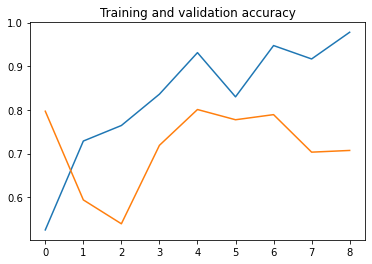

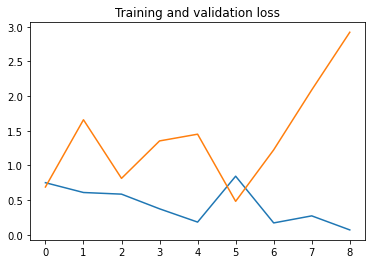

In [0]:
# Evaluating accuracy and loss for the model
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')